<a href="https://colab.research.google.com/github/rukmals/TensorFlow-Decision-Forest/blob/main/TensorFlow_Decision_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Installing tensorflow_decision_forests

In [1]:
%%capture
pip install tensorflow_decision_forests

In [26]:
pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importing libraries

In [27]:
import tensorflow_decision_forests as tfdf
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.3.0


#### Load the dataset

In [4]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
df = pd.read_csv("/tmp/penguins.csv")

# Display the first 3 examples.
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [5]:
df.shape

(344, 8)

In [6]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [7]:
label = "species"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


In [8]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
#drop NaN values
df = df.dropna()

In [10]:
df.shape

(333, 8)

#### Plot the target

<Axes: xlabel='species', ylabel='count'>

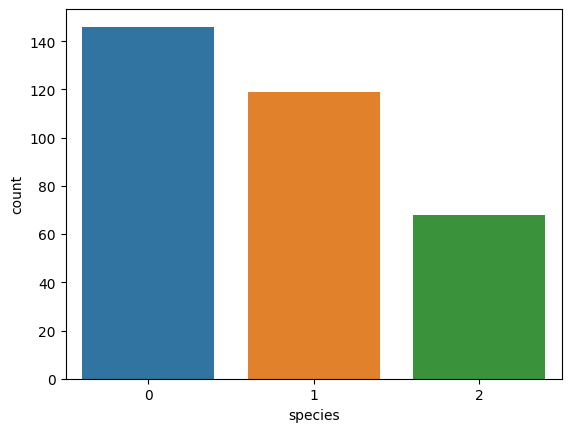

In [28]:
sns.countplot(x='species', data=df)

#### Split Train and Test data

In [11]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

223 examples in training, 110 examples for testing.


In [12]:
label = "species"

In [13]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

#### Hyper Parameter tunning

In [14]:
# tuner = tfdf.tuner.RandomSearch(num_trials=20)

# tuner.choice("max_depth", [4, 5, 6, 7])\
#      .choice("num_trees", [50, 100, 200])\
#      .real("learning_rate", 0.01, 0.1, sampling="log")\
#      .integer("max_leaf_nodes", 10, 100)\
#      .discretized("min_split_loss", 0.1, 1, 5)

In [79]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)

tuner.choice("max_depth", [4, 5, 6, 7]).choice("num_trees",[300,400])

#### Train the model

In [80]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2,tuner=tuner)

# Train the model.
model_1.compile(metrics=["accuracy"])
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpd7vg9yxb as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'year': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERIC

[INFO 23-04-20 14:30:22.9866 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-04-20 14:30:22.9869 UTC kernel.cc:774] Collect training examples
[INFO 23-04-20 14:30:22.9869 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-04-20 14:30:22.9877 UTC kernel.cc:393] Number of batches: 1
[INFO 23-04-20 14:30:22.9877 UTC kernel.cc:394] Number of examples: 223
[INFO 23-04-20 14:30:22.9881 UTC kernel.cc:794] Training dataset:
Number of records: 223
Number of columns: 8

Number of columns by type:
	NUMERICAL: 5 (62.5%)
	CATEGORICAL: 3 (37.5%)

Columns:

NUMERICAL: 5 (62.5%)
	1: "bill_depth_mm" NUMERICAL mean:17.161 min:13.1 max:21.5 sd:1.98843

Model trained in 0:00:01.874732
Compiling model...
Model compiled.


In [101]:
model_1.compile(["accuracy"])
tuned_test_accuracy = model_1.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.9182


#### Evaluate the model

In [81]:
evaluation = model_1.evaluate(test_ds, return_dict=True)


for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 195ms/step - loss: 0.0000e+00 - accuracy: 0.9182
loss: 0.0000
accuracy: 0.9182


In [82]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "flipper_length_mm"  0.493959 ################
    2.    "bill_length_mm"  0.455240 #############
    3.            "island"  0.321743 ####
    4.       "body_mass_g"  0.311002 ###
    5.     "bill_depth_mm"  0.302848 ##
    6.              "year"  0.262503 
    7.               "sex"  0.262240 

Variable Importance: NUM_AS_ROOT:
    1. "flipper_length_mm" 157.000000 ################
    2.    "bill_length_mm" 93.000000 #########
    3.     "bill_depth_mm" 24.000000 #
    4.       "

## Inspector

In [19]:
inspector = model_1.make_inspector()

In [20]:
[field for field in dir(inspector) if not field.startswith("_")]

['MODEL_NAME',
 'dataspec',
 'directory',
 'evaluation',
 'export_to_tensorboard',
 'extract_all_trees',
 'extract_tree',
 'features',
 'file_prefix',
 'header',
 'iterate_on_nodes',
 'label',
 'label_classes',
 'metadata',
 'model_type',
 'num_trees',
 'objective',
 'specialized_header',
 'task',
 'training_logs',
 'tuning_logs',
 'variable_importances',
 'winner_take_all_inference']

In [21]:
inspector.evaluation()

Evaluation(num_examples=223, accuracy=0.968609865470852, loss=0.07342715261320296, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [87]:
print(dir(inspector)) 

['MODEL_NAME', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_dataspec', '_directory', '_file_prefix', '_header', '_make_simple_column_spec', '_specialized_header', 'dataspec', 'directory', 'evaluation', 'export_to_tensorboard', 'extract_all_trees', 'extract_tree', 'features', 'file_prefix', 'header', 'iterate_on_nodes', 'label', 'label_classes', 'metadata', 'model_type', 'num_trees', 'objective', 'specialized_header', 'task', 'training_logs', 'tuning_logs', 'variable_importances', 'winner_take_all_inference']


In [95]:
# Display the tuning logs.
tuning_logs = model_1.make_inspector().tuning_logs()
tuning_logs.head()

,score,evaluation_time,best,max_depth,num_trees
0,0.96861,0.186382,True,7,300
1,0.96861,0.315587,False,4,400
2,0.96861,0.539933,False,5,400
3,0.96861,0.684632,False,7,400
4,0.96861,0.823816,False,6,400


In [94]:
tuning_logs.loc[tuning_logs.best==True] #The single rows with best=True is the one used in the final model.

,score,evaluation_time,best,max_depth,num_trees
0,0.96861,0.186382,True,7,300


#### Plot the evaluation of the best score during the tuning

In [97]:
# plt.figure(figsize=(10, 5))
# plt.plot(tuning_logs["score"], label="current trial")
# plt.plot(tuning_logs["score"].cummax(), label="best trial")
# plt.xlabel("Tuning step")
# plt.ylabel("Tuning score")
# plt.legend()
# plt.show()

#### Variable importance

In [22]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE


In [88]:
# Mean decrease in AUC of the class 1 vs the others.
def plot_var_important(var_important_key,inspector):
  col_name_list,val_list = [],[]
  for col_name,val in inspector.variable_importances()[var_important_key]:
    col_name_list.append(col_name), val_list.append(val)

  data_frame = pd.DataFrame({"feature":col_name_list,"importance":val_list})
  data_frame = data_frame.sort_values(by='importance', ascending=True)
  data_frame.plot.barh(x='feature', y='importance',title="variable importances for "+var_important_key)

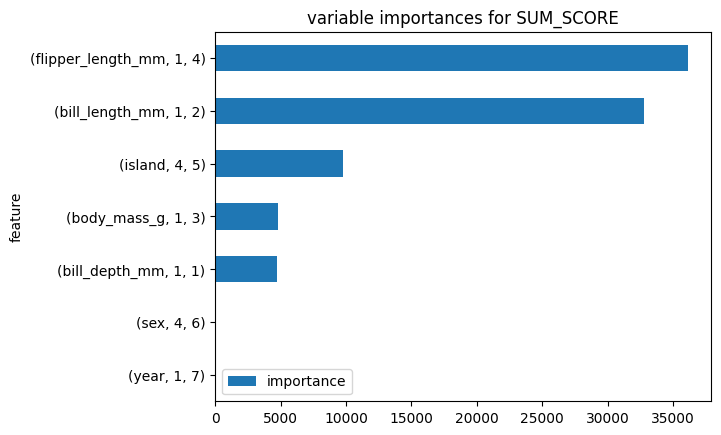

In [89]:
plot_var_important("SUM_SCORE",inspector)

#### Ploting training accuracy and loss

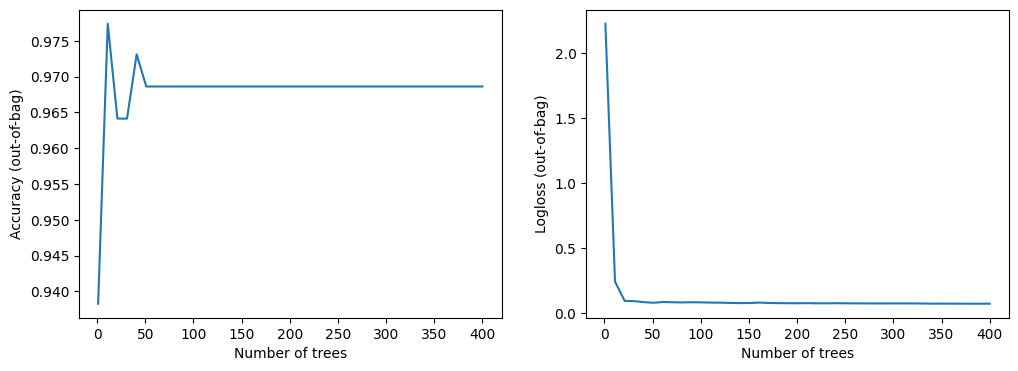

In [25]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# Visualizing TensorFlow Decision Forest Trees with dtreeviz

In [29]:
pip install -q -U dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 2.6 MB/s eta 0:00:00


In [30]:
import dtreeviz

In [31]:
dtreeviz.__version__

'2.2.1'

### Display decision tree

In [44]:
# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

In [40]:
# Tell dtreeviz about training data and model
penguin_features = [f.name for f in inspector.features()]
viz_cmodel = dtreeviz.model(model_1,
                           tree_index=0,
                           X_train=train_ds_pd[penguin_features],
                           y_train=train_ds_pd[label],
                           feature_names=penguin_features,
                           target_name=label,
                           class_names=classes)

In [43]:
penguin_features

['bill_depth_mm',
 'bill_length_mm',
 'body_mass_g',
 'flipper_length_mm',
 'island',
 'sex',
 'year']

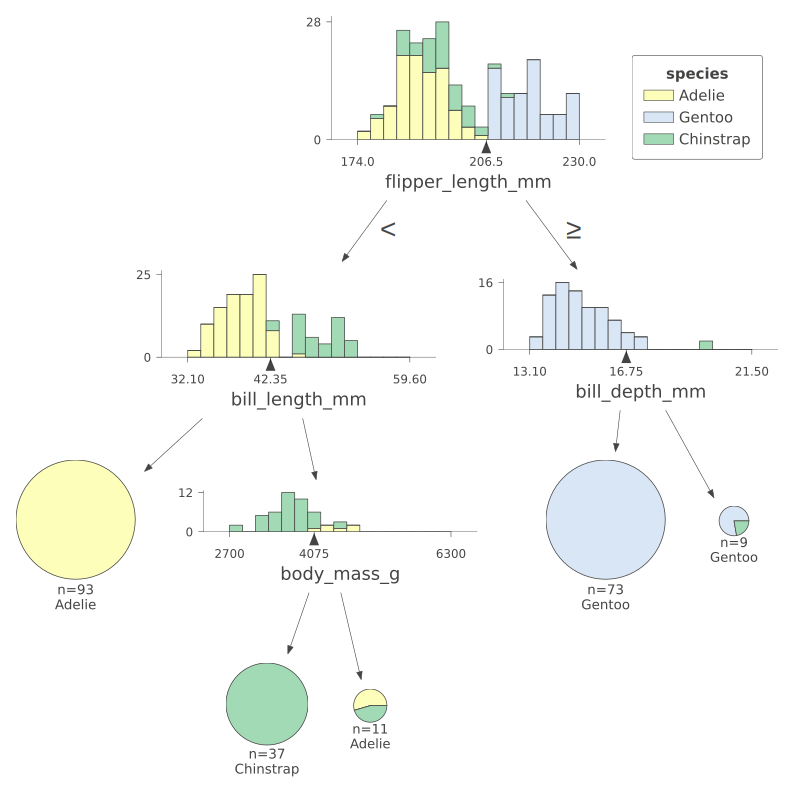

In [46]:
viz_cmodel.view(scale=2.0)

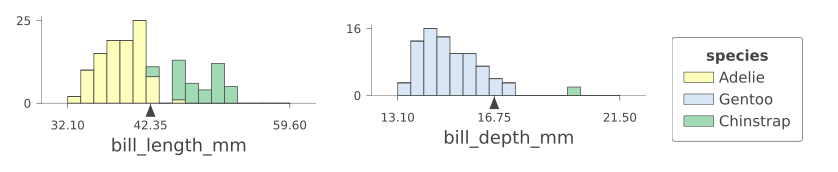

In [48]:
viz_cmodel.view(depth_range_to_display=[1,1], scale=2.0)

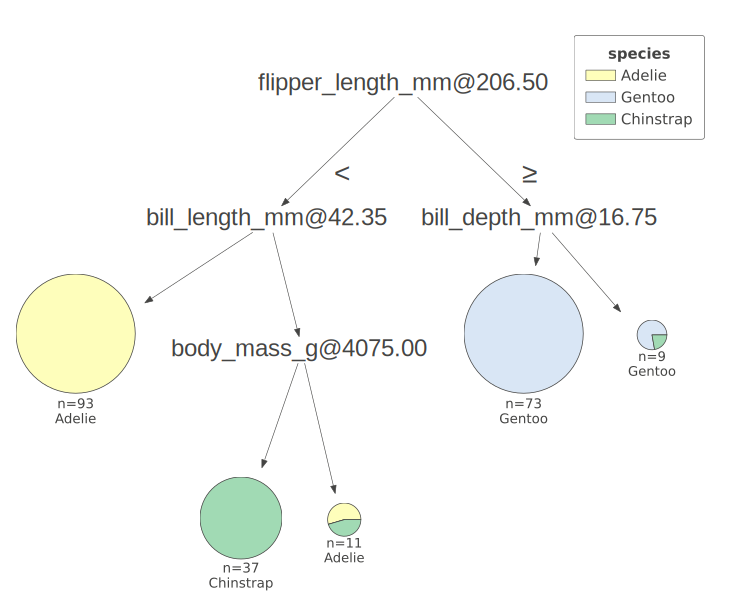

In [50]:
viz_cmodel.view(fancy=False, scale=2.0)

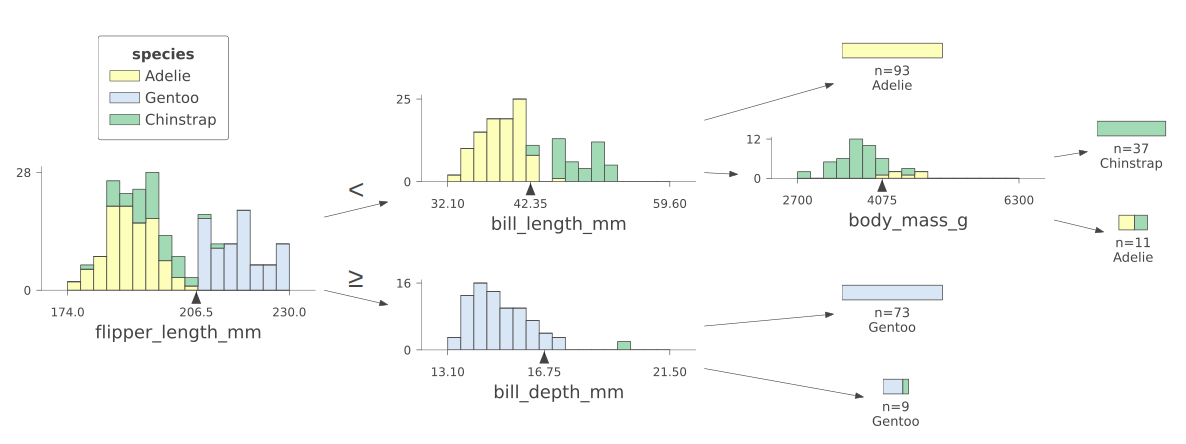

In [53]:
viz_cmodel.view(orientation='LR', scale=2.0 , leaftype='barh')

#### Number of training data instances that are grouped into each leaf node:

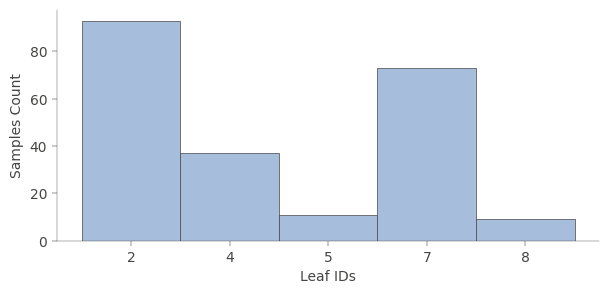

In [58]:
viz_cmodel.leaf_sizes(figsize=(7,3))

#### A perhaps more interesting graph is one that shows the proportion of each kind of training instance in the various leaves. The goal of training is to have leaves with a single color because it represents "pure" nodes that can predict that class with high confidence.

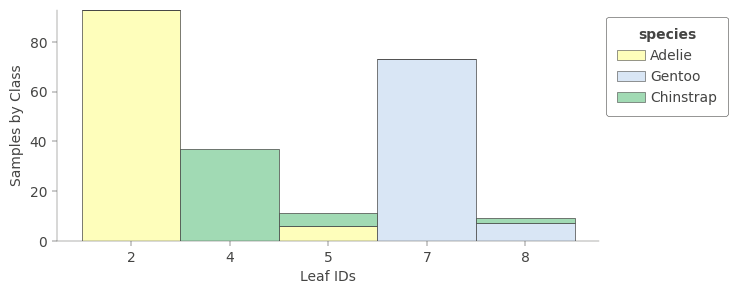

In [60]:
viz_cmodel.ctree_leaf_distributions(figsize=(7,3))

In [65]:
viz_cmodel.node_stats(node_id=8)

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,year
count,9.0,9.0,9.0,9.0,9,9,9.0
unique,<NA>,<NA>,<NA>,<NA>,2,1,<NA>
top,<NA>,<NA>,<NA>,<NA>,Biscoe,male,<NA>
freq,<NA>,<NA>,<NA>,<NA>,7,9,<NA>
mean,17.655556,52.177778,5272.222222,223.555556,NaN,NaN,2008.555556
std,1.170589,4.475147,676.438796,8.748016,NaN,NaN,0.726483
min,16.8,44.4,4000.0,207.0,NaN,NaN,2007.0
25%,17.0,49.8,5250.0,219.0,NaN,NaN,2008.0
50%,17.1,52.1,5550.0,228.0,NaN,NaN,2009.0
75%,17.3,55.8,5600.0,230.0,NaN,NaN,2009.0


## How decision trees classify an instance

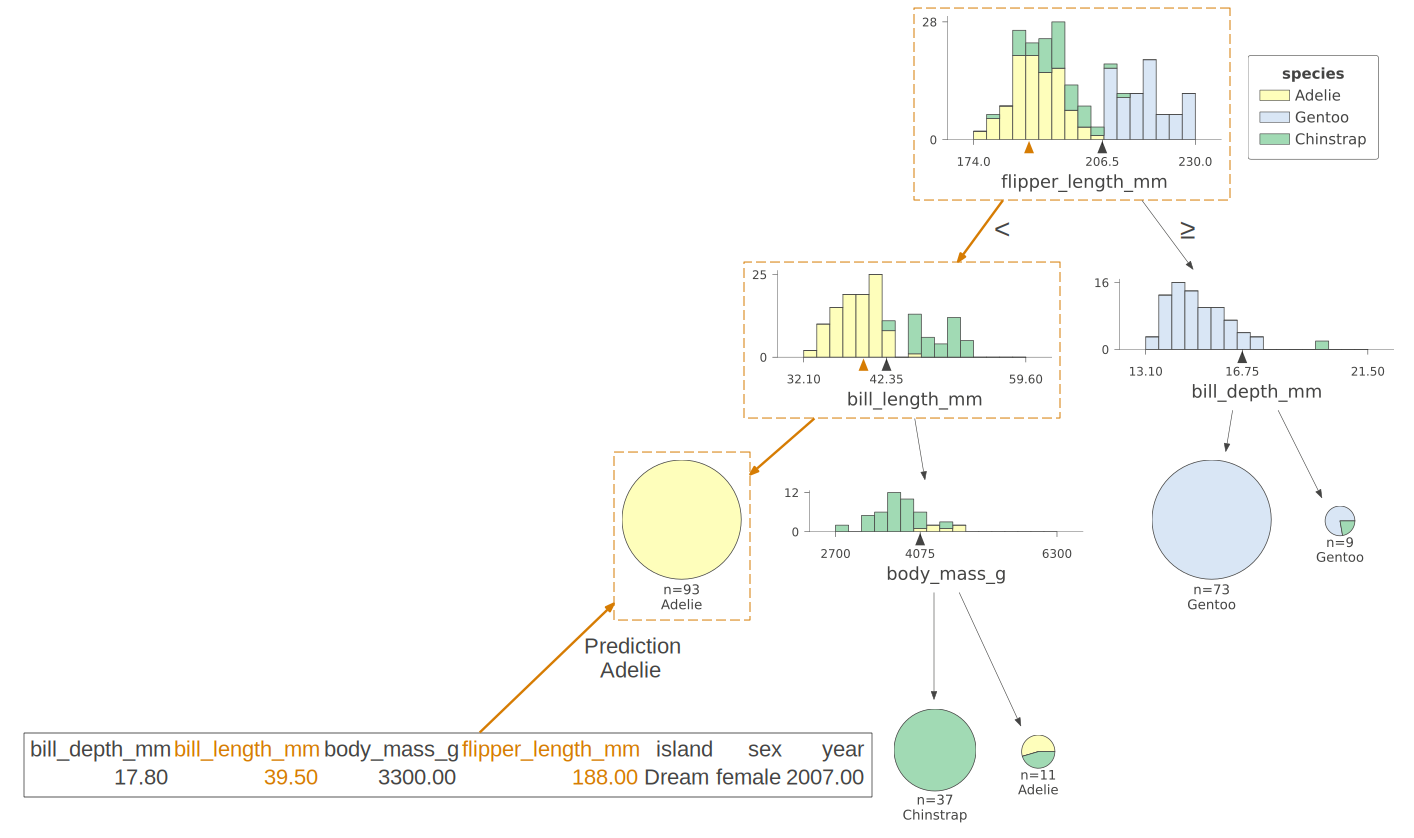

In [67]:
x = train_ds_pd[penguin_features].iloc[20]
viz_cmodel.view(x=x, scale=2.0)

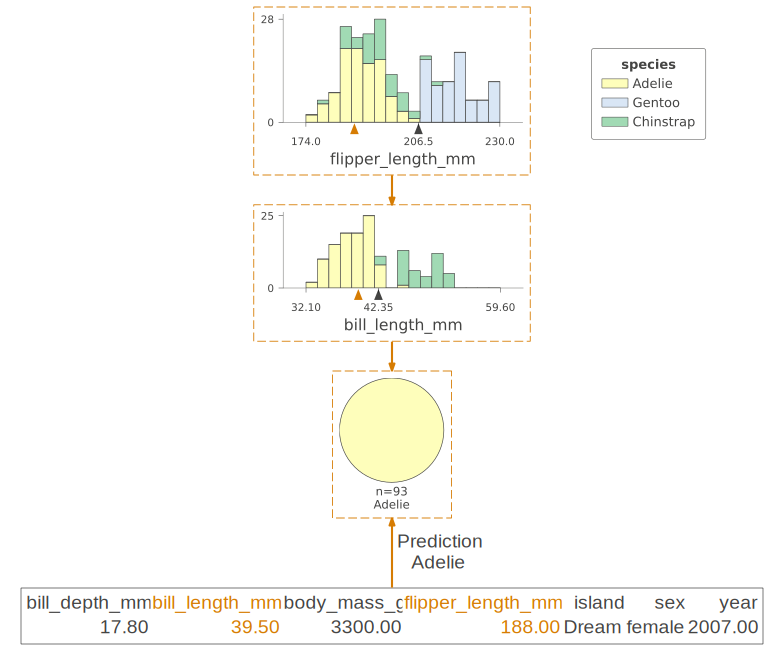

In [68]:
viz_cmodel.view(x=x, show_just_path=True, scale=1.75)

In [69]:
print(viz_cmodel.explain_prediction_path(x=x))

bill_length_mm < 42.35
flipper_length_mm < 206.5



## Feature space partitioning

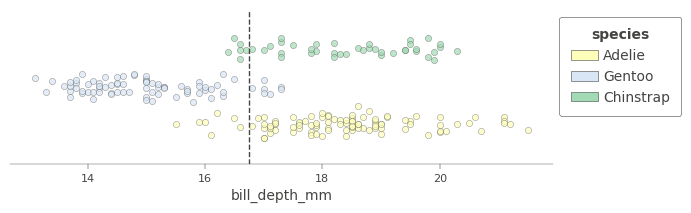

In [73]:
viz_cmodel.ctree_feature_space(features=['bill_depth_mm'], show={'splits','legend'}, figsize=(7,2))

### We can also examine the how the tree partitions feature space for two features at once, such as flipper_length_mm and bill_length_mm:

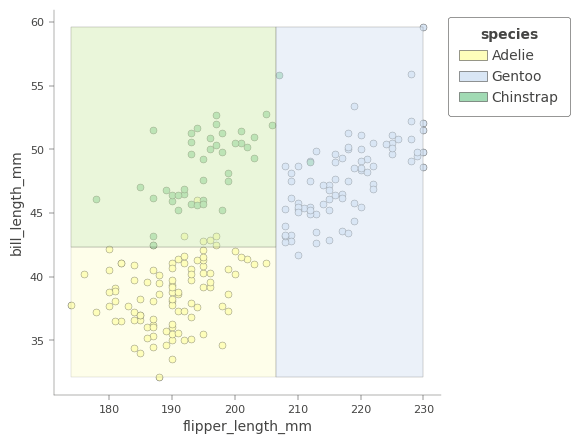

In [74]:
viz_cmodel.ctree_feature_space(features=['flipper_length_mm','bill_length_mm'],show={'splits','legend'}, figsize=(5,5))

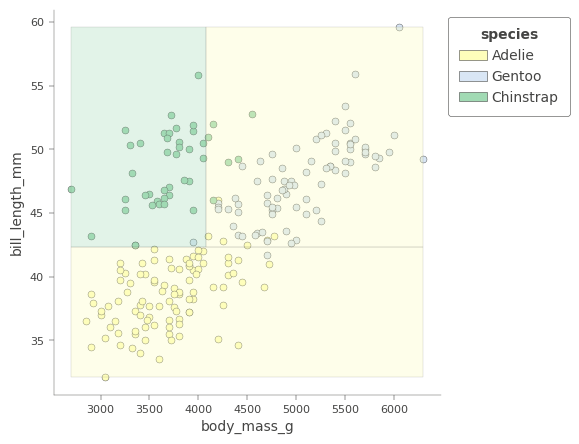

In [75]:
viz_cmodel.ctree_feature_space(features=['body_mass_g','bill_length_mm'],
                               show={'splits','legend'}, figsize=(5,5))

# **Training a model with automated hyper-parameter tuning and automatic definition of the hyper-parameters (Recommended Approach).**

In [99]:
# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner_2 = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# Define and train the model.
model_2 = tfdf.keras.RandomForestModel(tuner=tuner_2)
model_2.fit(train_ds, verbose=2)

Use /tmp/tmp6cvfl9dz as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'year': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Ca

[INFO 23-04-20 16:09:14.7749 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-04-20 16:09:14.7752 UTC kernel.cc:774] Collect training examples
[INFO 23-04-20 16:09:14.7752 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-04-20 16:09:14.7762 UTC kernel.cc:393] Number of batches: 1
[INFO 23-04-20 16:09:14.7762 UTC kernel.cc:394] Number of examples: 223
[INFO 23-04-20 16:09:14.7766 UTC kernel.cc:794] Training dataset:
Number of records: 223
Number of columns: 8

Number of columns by type:
	NUMERICAL: 5 (62.5%)
	CATEGORICAL: 3 (37.5%)

Columns:

NUMERICAL: 5 (62.5%)
	1: "bill_depth_mm" NUMERICAL mean:17.161 min:13.1 max:21.5 sd:1.98843

Model trained in 0:00:41.137054
Compiling model...
Model compiled.


In [100]:
model_2.compile(["accuracy"])
tuned_test_accuracy = model_2.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.9818


In [102]:
# Display the tuning logs.
tuning_logs_2 = model_2.make_inspector().tuning_logs()
tuning_logs_2.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
0,0.802691,0.994671,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,CART,true,12,40
1,0.995516,1.557543,True,SPARSE_OBLIQUE,5.0,MIN_MAX,CONTINUOUS,CART,true,16,1
2,0.986547,2.184274,False,SPARSE_OBLIQUE,4.0,MIN_MAX,CONTINUOUS,RANDOM,true,16,10
3,0.982063,2.871174,False,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,BINARY,CART,true,25,2
4,0.973094,3.195611,False,SPARSE_OBLIQUE,1.0,MIN_MAX,CONTINUOUS,CART,true,20,10


In [111]:
tuning_logs_2.loc[tuning_logs_2.best==True] #The single rows with best=True is the one used in the final model.

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
1,0.995516,1.557543,True,SPARSE_OBLIQUE,5.0,MIN_MAX,CONTINUOUS,CART,true,16,1


In [109]:
# Best hyper-parameters.
tuning_logs_2[tuning_logs_2.best].iloc[0]

score                                             0.995516
evaluation_time                                   1.557543
best                                                  True
split_axis                                  SPARSE_OBLIQUE
sparse_oblique_projection_density_factor               5.0
sparse_oblique_normalization                       MIN_MAX
sparse_oblique_weights                          CONTINUOUS
categorical_algorithm                                 CART
winner_take_all                                       true
max_depth                                               16
min_examples                                             1
Name: 1, dtype: object

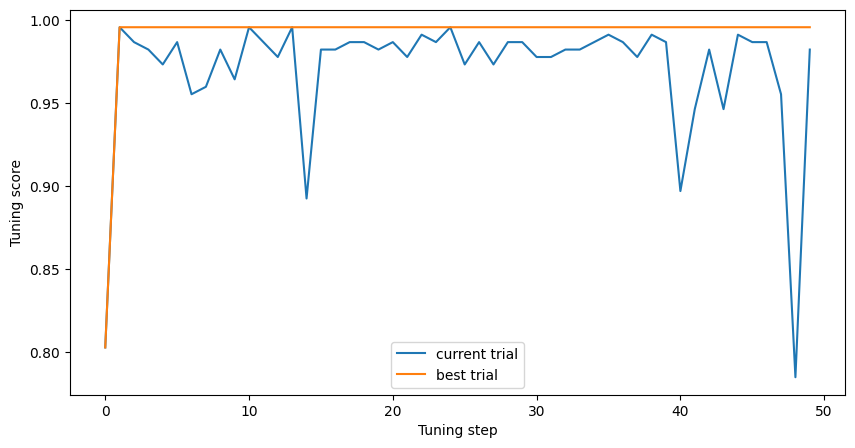

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs_2["score"], label="current trial")
plt.plot(tuning_logs_2["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()